Coeficientes beta del polinomio de grado 9:
[ 0.00000000e+00  4.31071289e-12 -1.34628364e+00 -6.50324729e-12
  5.00108131e-01  2.64476288e-12 -6.83979676e-02 -3.97333853e-13
  3.13362762e-03  1.98381219e-14]


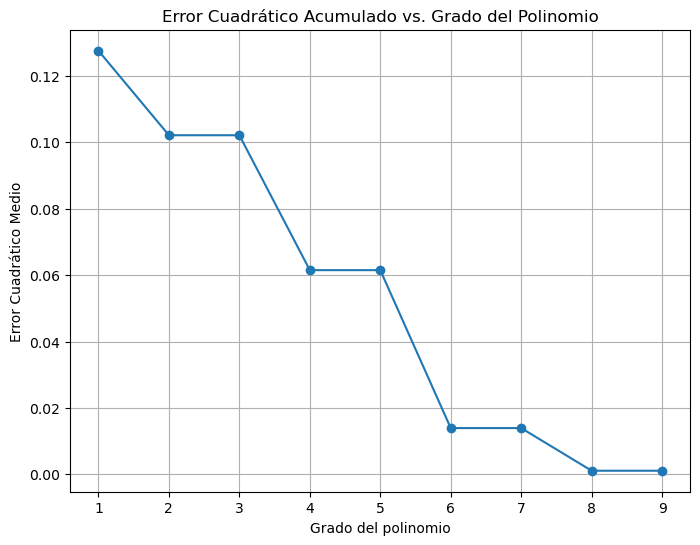

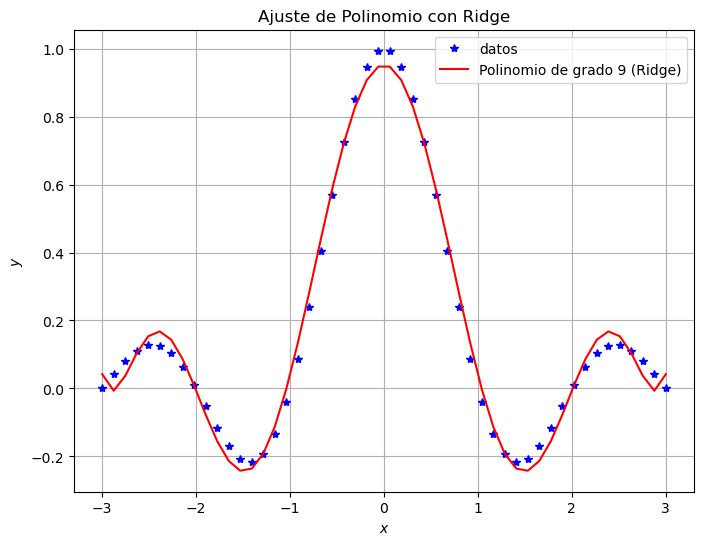

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Definir la función sinc
def f(x):
    return np.sinc(x)

# Generar datos
x1 = np.linspace(-3, 3)
y1 = f(x1)

# Crear un array para almacenar los errores cuadráticos acumulados
mse_values = []

# Ajustar polinomios de grado 1 hasta grado 9
for degree in range(1, 10):
    # Crear matriz de características polinómicas
    X_poly = np.vander(x1, degree + 1, increasing=True)
    
    # Ajustar modelo de regresión Ridge con coeficiente de 0.01
    ridge = Ridge(alpha=0.01)
    ridge.fit(X_poly, y1)
    
    # Realizar predicciones
    y_pred = ridge.predict(X_poly)
    
    # Calcular el error cuadrático medio
    mse = mean_squared_error(y1, y_pred)
    mse_values.append(mse)

# Graficar el error cuadrático acumulado contra el número de términos
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), mse_values, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error Cuadrático Acumulado vs. Grado del Polinomio')
plt.grid(True)

# Elegir el grado del polinomio con el menor error
best_degree = np.argmin(mse_values) + 1  # Sumamos 1 porque el grado comienza desde 1

# Ajustar el polinomio seleccionado con Ridge con coeficiente de 0.01
X_poly_best = np.vander(x1, best_degree + 1, increasing=True)
ridge_best = Ridge(alpha=0.01)
ridge_best.fit(X_poly_best, y1)

# Obtener los coeficientes beta del polinomio seleccionado
beta_values = ridge_best.coef_

# Imprimir los coeficientes beta
print(f"Coeficientes beta del polinomio de grado {best_degree}:")
print(beta_values)

# Graficar los datos y el polinomio ajustado
y_pred_best = ridge_best.predict(X_poly_best)

plt.figure(figsize=(8, 6))
plt.plot(x1, y1, '*b', label='datos')
plt.plot(x1, y_pred_best, 'r', label=f'Polinomio de grado {best_degree} (Ridge)')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Ajuste de Polinomio con Ridge')
plt.grid()

plt.show()